Text(0.5, 1.0, 'GMM Classification')

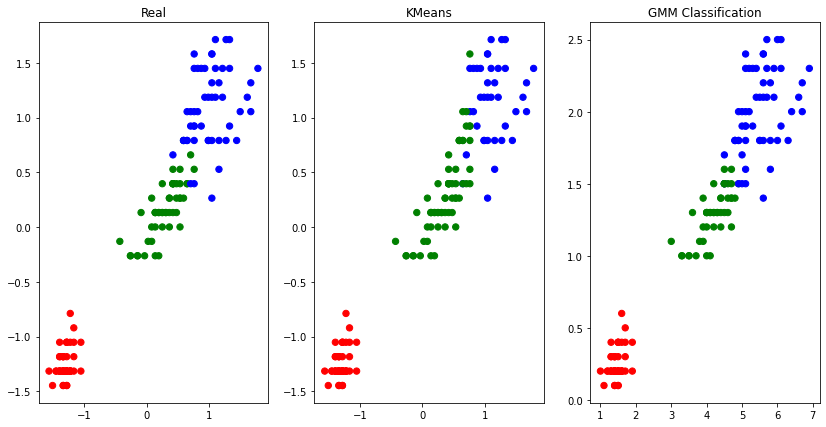

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
iris=load_iris()
df=pd.DataFrame(iris['data'],columns=iris['feature_names'])
df['target']=iris['target']
X=df.iloc[:,:-1]
y=df['target']

from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_array=scaler.transform(X)
X_scaled=pd.DataFrame(X_scaled_array,columns=X.columns)
plt.figure(figsize=(14,7))
colormap=np.array(['red','green','blue'])


plt.subplot(1,3,1)
plt.scatter(X_scaled['petal length (cm)'],X_scaled['petal width (cm)'],c=colormap[y],s=40)
plt.title('Real')


plt.subplot(1,3,2)
model=KMeans(n_clusters=3,random_state=0)
pred_y=model.fit_predict(X)
pred_y=np.choose(pred_y,[1,0,2]).astype(np.int64)
plt.scatter(X_scaled['petal length (cm)'],X_scaled['petal width (cm)'],c=colormap[pred_y],s=40)
plt.title('KMeans')


gmm=GaussianMixture(n_components=3,max_iter=200)
y_cluster_gmm=gmm.fit_predict(X_scaled)
y_cluster_gmm=np.choose(y_cluster_gmm,[2,0,1]).astype(np.int64)
plt.subplot(1,3,3)
plt.scatter(X['petal length (cm)'],X['petal width (cm)'],c=colormap[y_cluster_gmm],s=40)
plt.title('GMM Classification')